In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
bitcoin = pd.read_csv('Data/coindesk-bpi-USD-close_data-2017-11-06_2017-12-06.csv',
                      index_col='Date', parse_dates=True)[:-2]

bitcoin.index = pd.to_datetime(bitcoin.index, dayfirst=True)

In [4]:
len(bitcoin)

741

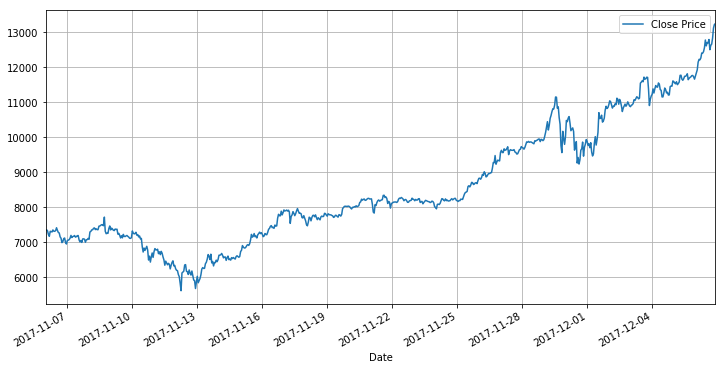

In [5]:
bitcoin.plot(grid=True, logy=False);

In [6]:
bitcoin['Returns'] = (bitcoin['Close Price'] / bitcoin['Close Price'].shift(1))
bitcoin.Returns.fillna(1, inplace=True)

In [7]:
bitcoin.head()

,Close Price,Returns
Date,,
2017-11-06 00:00:00,7348.27,1.000000
2017-11-06 01:00:00,7359.15,1.001481
2017-11-06 02:00:00,7329.99,0.996038
2017-11-06 03:00:00,7225.72,0.985775
2017-11-06 04:00:00,7173.02,0.992707


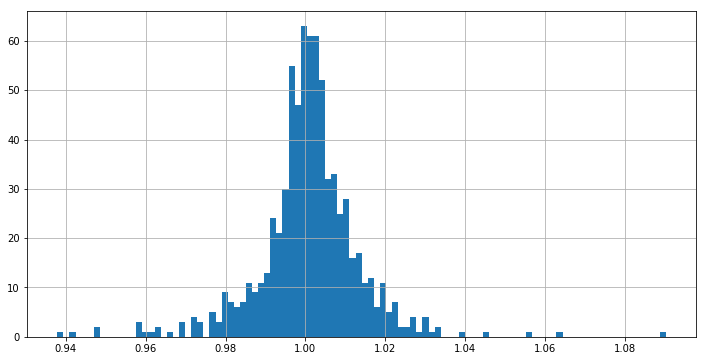

In [8]:
bitcoin.Returns.hist(bins=100);

In [9]:
bitcoin.index[-1]

Timestamp('2017-12-06 22:01:00')

In [10]:
stamp = bitcoin.index[-1].tz_localize('Europe/Madrid')
new_stamp = stamp.tz_convert('Etc/GMT+8')
new_stamp

Timestamp('2017-12-06 13:01:00-0800', tz='Etc/GMT+8')

In [11]:
end = pd.Timestamp(year=2017, month=12, day=20, hour=8, minute=6).tz_localize('Etc/GMT+8')
end = end.tz_convert('Europe/Madrid')
end

Timestamp('2017-12-20 17:06:00+0100', tz='Europe/Madrid')

In [12]:
start = bitcoin.index[-1].tz_localize('Europe/Madrid')

In [13]:
index_future = pd.date_range(start=start, end=end, freq='H')
index_future

DatetimeIndex(['2017-12-06 22:01:00+01:00', '2017-12-06 23:01:00+01:00',
               '2017-12-07 00:01:00+01:00', '2017-12-07 01:01:00+01:00',
               '2017-12-07 02:01:00+01:00', '2017-12-07 03:01:00+01:00',
               '2017-12-07 04:01:00+01:00', '2017-12-07 05:01:00+01:00',
               '2017-12-07 06:01:00+01:00', '2017-12-07 07:01:00+01:00',
               ...
               '2017-12-20 08:01:00+01:00', '2017-12-20 09:01:00+01:00',
               '2017-12-20 10:01:00+01:00', '2017-12-20 11:01:00+01:00',
               '2017-12-20 12:01:00+01:00', '2017-12-20 13:01:00+01:00',
               '2017-12-20 14:01:00+01:00', '2017-12-20 15:01:00+01:00',
               '2017-12-20 16:01:00+01:00', '2017-12-20 17:01:00+01:00'],
              dtype='datetime64[ns, Europe/Madrid]', length=332, freq='H')

In [14]:
len(index_future)

332

In [104]:
np.random.seed(1234)
simulated_returns = np.random.choice(bitcoin.Returns, size=(len(index_future), 100000))
simulated_returns.shape

(332, 100000)

In [105]:
simulated_returns

array([[ 1.00428696,  0.98896161,  1.00597434, ...,  0.99715629,
         1.01279993,  0.98896161],
       [ 1.00057214,  1.00035631,  0.99851239, ...,  0.99894383,
         0.99715629,  1.00596553],
       [ 1.00403977,  1.00391753,  1.0101537 , ...,  1.06358999,
         0.9919335 ,  1.01699646],
       ..., 
       [ 1.02624273,  1.0002132 ,  1.00429873, ...,  0.99987657,
         1.00739627,  1.00396932],
       [ 1.00135343,  1.01169028,  0.98428819, ...,  0.98611965,
         1.00497477,  0.99694755],
       [ 1.00032199,  1.00756191,  1.00761073, ...,  0.99564635,
         0.99219229,  0.99964495]])

In [106]:
simulated_cum_returns = simulated_returns.cumprod(axis=0)

In [107]:
future = pd.DataFrame(data = simulated_cum_returns, index=index_future)
future = future * bitcoin['Close Price'][-1]

In [108]:
possible_prices = future.iloc[-1, :]
possible_prices.name = 'Possible price'

In [ ]:
future.iloc[:, :100].plot(legend=False, logy=False, grid=True);
plt.title('Bitcoin price evolution simulation until Dec 20th')
plt.ylabel('Price')
plt.xlabel('Date');

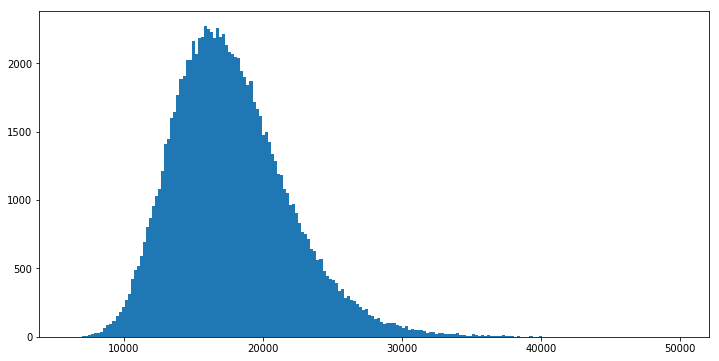

In [111]:
y, x, _ = plt.hist(possible_prices, bins=200);

In [112]:
np.argmax(y)

44

In [117]:
x[np.argmax(y)]

15761.554585611242

In [120]:
[x[np.argmax(y)], x[np.argmax(y) + 1]]

[15761.554585611242, 15980.49388671385]

In [121]:
np.mean(np.array([x[np.argmax(y)], x[np.argmax(y) + 1]]))

15871.024236162546

In [186]:
from scipy import stats

fkde = stats.gaussian_kde(possible_prices)

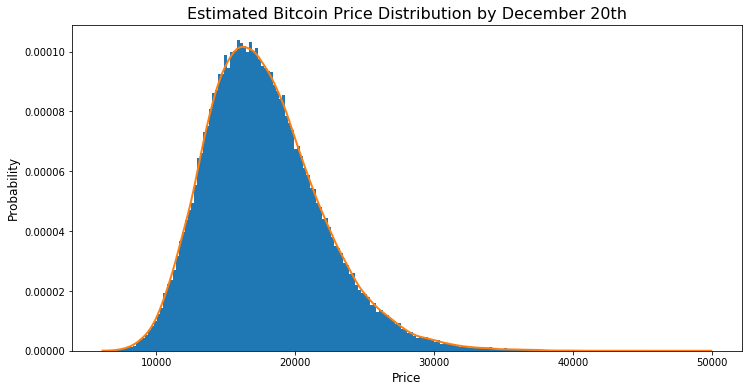

In [185]:
fig, ax = plt.subplots(1, 1)

bins = 200

ax.hist(possible_prices, bins=bins, density=True);

xd = np.linspace(min(possible_prices)-10, max(possible_prices)+10, bins)
ax.plot(xd, kde.pdf(xd), linewidth=2);

ax.set_xlabel('Price', size=12)
ax.set_ylabel('Probability', size=12)
ax.set_title('Estimated Bitcoin Price Distribution by December 20th', size=16);

In [217]:
most_likely_prices = np.linspace(start=14000, stop=18000, num=4001)

In [218]:
most_likely_prices[np.argmax(kde.pdf(most_likely_prices))]

16184.0